In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
path_archivo = "../input_data/f_Omega_Header.csv"
datos_full = pd.read_csv(path_archivo, delimiter=",")
#datos_full = datos_full[datos_full["Cry_st"] != "Isotropic"]

In [3]:
datos_full.head()

,Shape,Cry_st,Feasibility,Density,Lx,Ly,Lz,C00,C01,C02,...,(omega^2)_90,(omega^2)_91,(omega^2)_92,(omega^2)_93,(omega^2)_94,(omega^2)_95,(omega^2)_96,(omega^2)_97,(omega^2)_98,(omega^2)_99
0,Cylinder,Isotropic,Yes,7.589408,0.343555,0.477251,0.189279,0.737925,0.547395,0.547395,...,19.880029,19.888855,19.910148,19.952423,20.715001,21.236659,21.427997,21.692465,21.848734,21.856798
1,Cylinder,Isotropic,Yes,8.175308,0.067858,0.078669,0.366223,1.135501,0.885847,0.885847,...,209.759981,215.377078,220.305785,221.945685,223.275823,223.682229,227.656537,233.417460,233.747190,234.891028
2,Ellipsoid,Isotropic,Yes,3.369422,0.253694,0.328785,0.125075,1.300927,-0.041380,-0.041380,...,727.674776,731.944377,755.255490,758.204764,766.509317,780.562256,781.386587,784.045904,813.217460,823.805883
3,Cylinder,Isotropic,Yes,9.106255,0.364242,0.206580,0.452521,1.253347,0.557429,0.557429,...,54.553762,55.002873,55.751244,55.775812,58.227833,59.234315,60.510807,60.812053,62.032033,62.250029
4,Ellipsoid,Isotropic,Yes,2.118880,0.065954,0.401048,0.366781,1.759835,0.283689,0.283689,...,1490.592619,1579.146610,1581.976968,1649.527006,1649.939733,1653.234871,1702.614178,1702.668732,1716.247109,1748.791168


In [4]:
print("Cantidad de datos posibles: ", len(datos_full[datos_full["Feasibility"] == "Yes"]))
print("Cantidad de datos imposibles: ", len(datos_full[datos_full["Feasibility"] == "No"]))

Cantidad de datos posibles:  40010
Cantidad de datos imposibles:  0


In [5]:
datos_train, datos_test = train_test_split(datos_full, test_size = 0.35)
features = ["C00", "C11", "C22", "C33", "C44", "C55", "C01", "C02", "C12"]
X_full = datos_full[features]
y_full = datos_full["Feasibility"]

In [6]:
X_train = datos_train[features]
y_train = datos_train["Feasibility"]
X_test = datos_test[features]
y_test = datos_test["Feasibility"]

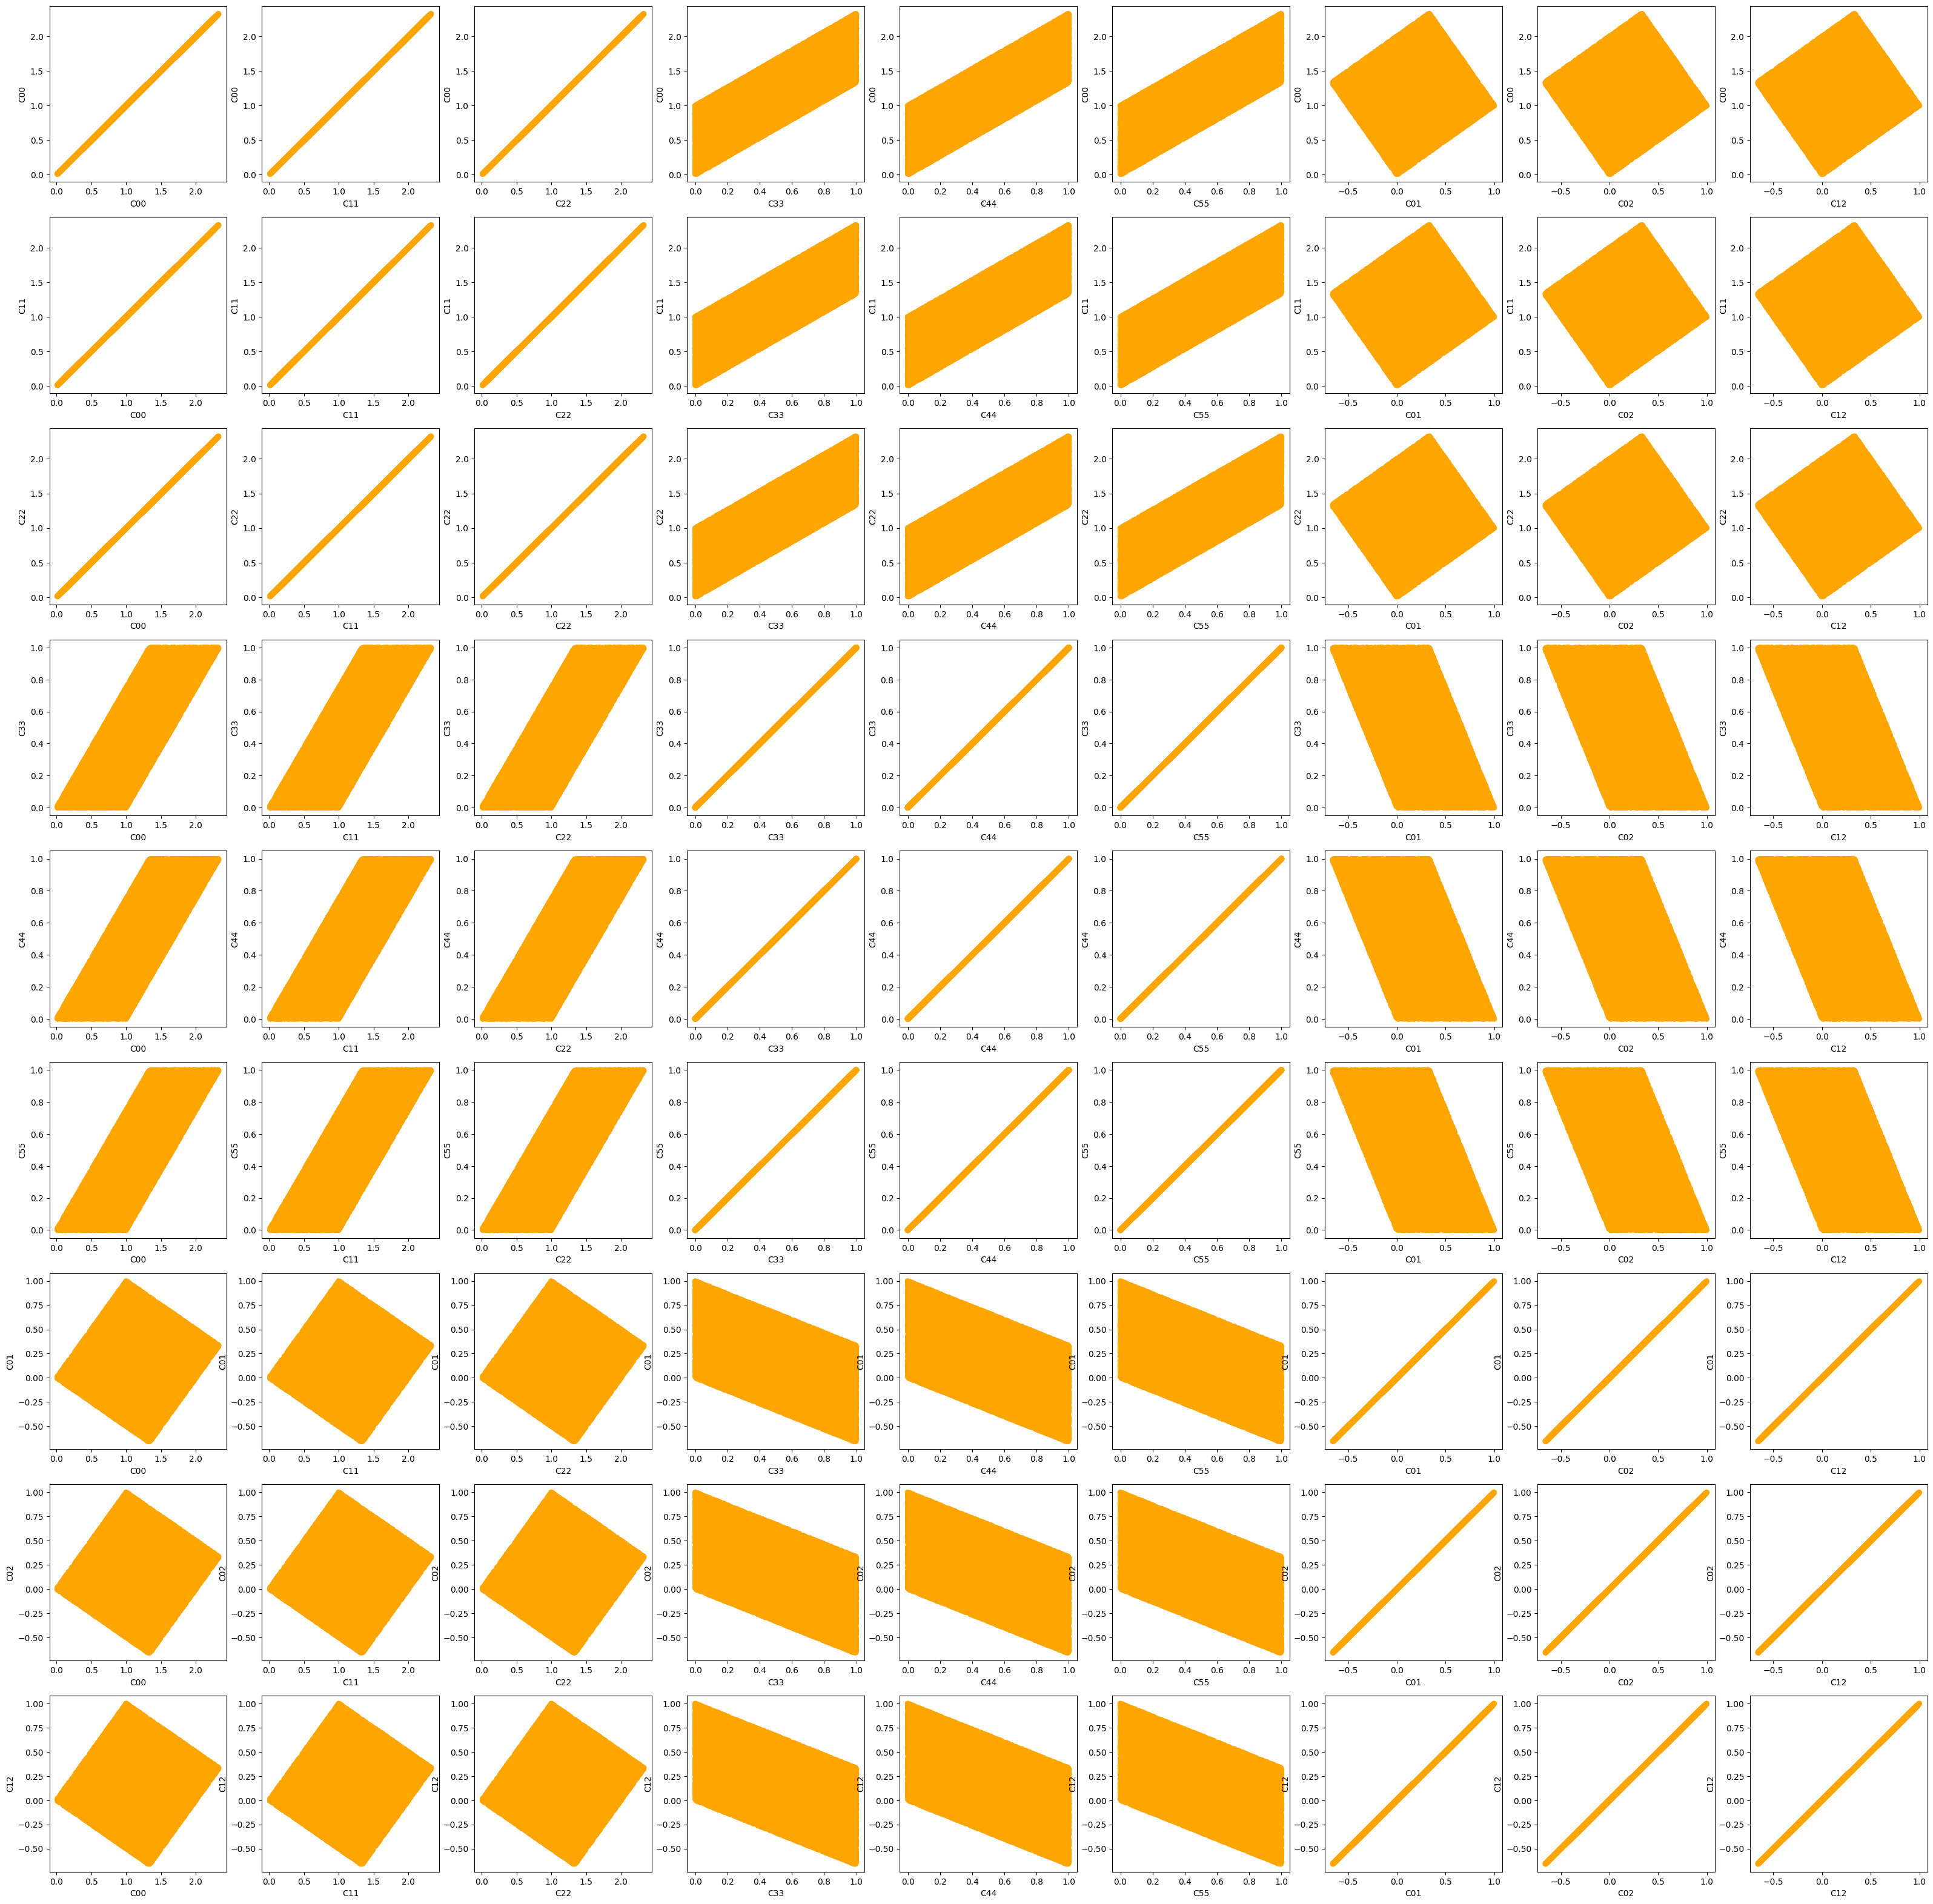

In [7]:
fig_full = plt.figure(figsize=(40,40))
colors_ref = {"No": "blue", "Yes": "orange"}
colors_array = list(map(lambda x: colors_ref[x], y_full))
for i, CX in enumerate(features):
    for j, CY in enumerate(features):
        ax = fig_full.add_subplot(len(features), len(features), i + 1 + len(features)*j)
        ax.scatter(X_full[CX], X_full[CY], c = colors_array)
        ax.set_xlabel(CX)
        ax.set_ylabel(CY)
    #fin for
#fin for 
plt.show()